In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [21]:
train_data = pd.read_csv("type2_train.csv")
valid_data = pd.read_csv("type2_valid.csv")
test_data = pd.read_csv("type2_test.csv")

In [3]:
categorical = ['Sex','HTN','DM']

In [22]:
for feature in categorical:
    le = LabelEncoder()
    le = le.fit(train_data[feature])
    train_data[feature] = le.transform(train_data[feature])
for feature in categorical:
    le = LabelEncoder()
    le = le.fit(valid_data[feature])
    valid_data[feature] = le.transform(valid_data[feature])

for feature in categorical:
    le = LabelEncoder()
    le = le.fit(test_data[feature])
    test_data[feature] = le.transform(test_data[feature])

In [23]:
man_train = train_data[train_data['Sex'] == 1]
woman_train = train_data[train_data['Sex'] == 0]

man_valid = valid_data[valid_data['Sex'] == 1]
woman_valid = valid_data[valid_data['Sex'] == 0]

man_test = test_data[test_data['Sex'] == 1]
woman_test = test_data[test_data['Sex'] == 0]

In [24]:
x_train = train_data.drop(['CarotidUS'], axis=1)
y_train = train_data['CarotidUS']
x_valid = valid_data.drop(['CarotidUS'], axis=1)
y_valid = valid_data['CarotidUS']
x_test = test_data.drop(['CarotidUS'], axis=1)
y_test = test_data['CarotidUS']

In [33]:
x_train = woman_train.drop(['CarotidUS'], axis=1)
y_train = woman_train['CarotidUS']
x_valid = woman_valid.drop(['CarotidUS'], axis=1)
y_valid = woman_valid['CarotidUS']
x_test = woman_test.drop(['CarotidUS'], axis=1)
y_test = woman_test['CarotidUS']

In [9]:
params = {
    'C': [0.1, 1, 10], # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'], # Kernel type
    'gamma': ['scale', 'auto'] # Kernel coefficient
}

In [30]:
best_acc = 0
best_params = {}
for c in params['C']:
    for kernel in params['kernel']:
        for gamma in params['gamma']:
            svm_clf = SVC(C = c, kernel = kernel, gamma= gamma)
            svm_clf.fit(x_train, y_train)
            pred = svm_clf.predict(x_valid)
            print('c: {0}, kerenl: {1}, gamma: {2}'.format(c, kernel, gamma))
            print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f}, f1: {3:.4f}'.format(accuracy_score(y_valid, pred), precision_score(y_valid, pred), recall_score(y_valid, pred), f1_score(y_valid, pred)))

            if accuracy_score(y_valid, pred) > best_acc:
                best_acc = accuracy_score(y_valid, pred)
                best_params['c'] = c
                best_params['kernel'] = kernel
                best_params['gamma'] = gamma

print('best params: {0}'.format(best_params))
print('best accuracy: {0:.4f}'.format(best_acc))
svm_clf = SVC(C=best_params['c'], kernel=best_params['kernel'], gamma=best_params['gamma'])
svm_clf.fit(x_train, y_train)
pred = svm_clf.predict(x_test)
print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f}, f1: {3:.4f}'.format(accuracy_score(y_test, pred), precision_score(y_test, pred), recall_score(y_test, pred), f1_score(y_test, pred)))
print(confusion_matrix(y_test, pred))

NameError: name 'params' is not defined

In [35]:
svm_clf = SVC(C=0.1, kernel='linear', gamma='auto')
svm_clf.fit(x_train, y_train)
pred = svm_clf.predict(x_test)
print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f}, f1: {3:.4f}'.format(accuracy_score(y_test, pred), precision_score(y_test, pred), recall_score(y_test, pred), f1_score(y_test, pred)))
print(confusion_matrix(y_test, pred))

accuracy: 0.5613, precision: 0.0000, recall: 0.0000, f1: 0.0000
[[591   0]
 [462   0]]


c:\Users\rinap\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


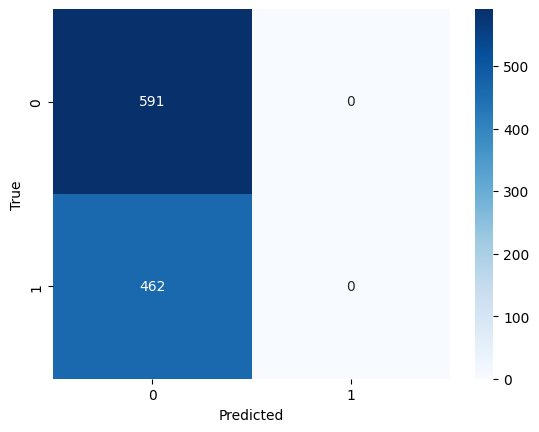

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

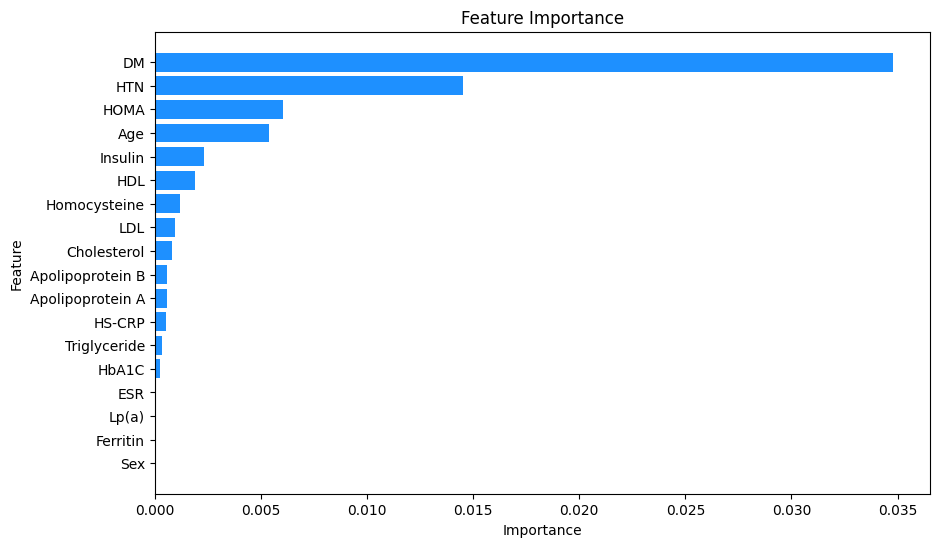

In [37]:


# Get the coefficient magnitudes
feature_importance = abs(svm_clf.coef_[0])

# Create a DataFrame of feature importance
feature_names = x_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance (ascending order)
feature_importance_df.sort_values(by='Importance', ascending=True, inplace=True)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='dodgerblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()